In [1]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [ ]:
import os
import matplotlib.pyplot as plt

In [ ]:
#print(os.getcwd())
#os.chdir("C:\\Users\\YESID\\Desktop\\ejercicio texto")
#print(os.getcwd())

In [ ]:
img = cv2.imread("/content/imagen_prueba.jpg")

In [ ]:
img

array([[[219, 211, 212],
        [219, 211, 212],
        [219, 211, 212],
        ...,
        [186, 185, 194],
        [186, 185, 194],
        [186, 185, 194]],

       [[219, 211, 212],
        [219, 211, 212],
        [219, 211, 212],
        ...,
        [186, 185, 194],
        [186, 185, 194],
        [186, 185, 194]],

       [[219, 211, 212],
        [219, 211, 212],
        [218, 210, 211],
        ...,
        [186, 185, 194],
        [186, 185, 194],
        [186, 185, 194]],

       ...,

       [[221, 213, 214],
        [221, 213, 214],
        [221, 213, 214],
        ...,
        [210, 202, 209],
        [210, 202, 209],
        [210, 202, 209]],

       [[221, 213, 214],
        [221, 213, 214],
        [221, 213, 214],
        ...,
        [210, 202, 209],
        [210, 202, 209],
        [210, 202, 209]],

       [[221, 213, 214],
        [221, 213, 214],
        [221, 213, 214],
        ...,
        [210, 202, 209],
        [210, 202, 209],
        [210, 202, 209]]

In [ ]:
print(type(img))

<class 'numpy.ndarray'>


In [ ]:
from google.colab.patches import cv2_imshow


In [ ]:
print(img.shape)

(125, 125, 3)


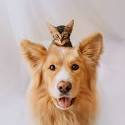

In [ ]:
cv2_imshow(img)

In [ ]:
#para rotar la imagen necesitamos el ancho y el alto
height, width = img.shape[0:2]

In [ ]:
img.shape[0:2]

(125, 125)

Bien, ahora tenemos nuestra matriz de imagen y queremos obtener la matriz de rotación. Para obtener la matriz de rotación, usamos el método getRotationMatrix2D() de cv2. La sintaxis de getRotationMatrix2D() es: cv2.getRotationMatrix2D(center, angle, scale)

Aquí el center es el punto central de rotación, el angle es el ángulo en grados y la scale es la propiedad de escala que hace que la imagen encaje en la pantalla.

Para obtener la matriz de rotación de nuestra imagen, el código será:

In [ ]:
rotationMatrix = cv2.getRotationMatrix2D((width/2, height/2), 90, .5)

El siguiente paso es rotar nuestra imagen con la ayuda de la matriz de rotación.

Para rotar la imagen, tenemos un método cv2 llamado wrapAffine que toma como argumentos la imagen original, la matriz de rotación de la imagen y el ancho y alto de la imagen.

In [ ]:
rotatedImage = cv2.warpAffine(img, rotationMatrix, (width, height))

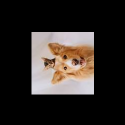

In [ ]:
#cv2.imshow('Rotated Image', rotatedImage)
cv2_imshow( rotatedImage)
#cv2.waitKey(0)

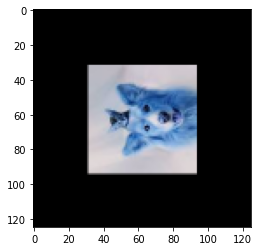

In [ ]:
plt.imshow(rotatedImage)
plt.show()

## Recortar una imagen
Primero, necesitamos importar el módulo cv2 y leer la imagen y extraer el ancho y alto de la imagen:

In [ ]:
img = cv2.imread("/content/imagen_prueba.jpg")
height, width = img.shape[0:2]

Ahora obtenga el índice inicial y final de la fila y la columna. Esto definirá el tamaño de la imagen recién creada. Por ejemplo, comience desde la fila número 10 hasta la fila número 15, le dará la altura de la imagen.

Del mismo modo, comience desde la columna número 10 hasta la columna número 15 que le dará el ancho de la imagen.

Puede obtener el punto de partida especificando el valor porcentual de la altura total y el ancho total. De manera similar, para obtener el punto final de la imagen recortada, especifique los valores porcentuales de la siguiente manera:

In [ ]:
startRow = int(height*.15)

startCol = int(width*.15)

endRow = int(height*.85)

endCol = int(width*.85)

In [ ]:
croppedImage = img[startRow:endRow, startCol:endCol]

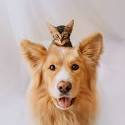

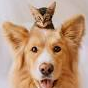

In [ ]:
#cv2.imshow('Original Image', img)

#cv2.imshow('Cropped Image', croppedImage)

#cv2.waitKey(0)

cv2_imshow( img)
cv2_imshow( croppedImage)

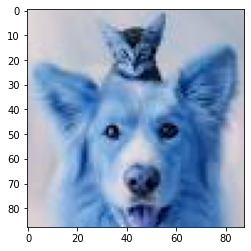

In [ ]:
plt.imshow(img)
plt.imshow(croppedImage)
plt.show()

## Cambiar el tamaño de una imagen
Para cambiar el tamaño de una imagen, puede usar el método resize() de openCV. En el método de cambio de tamaño, puede especificar los valores de los ejes x e y o el número de filas y columnas que indican el tamaño de la imagen.



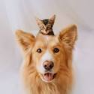

In [ ]:
newImg = cv2.resize(img, (0,0), fx=0.75, fy=0.75)

#cv2.imshow('Resized Image', newImg)

#cv2.waitKey(0)

cv2_imshow( newImg)


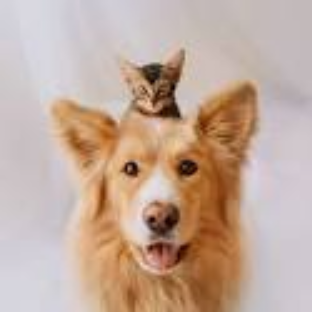

In [ ]:
newImg = cv2.resize(img, (0,0), fx=2.5, fy=2.5)

#cv2.imshow('Resized Image', newImg)

#cv2.waitKey(0)
cv2_imshow( newImg)

Si quiero de un tamaño especifico

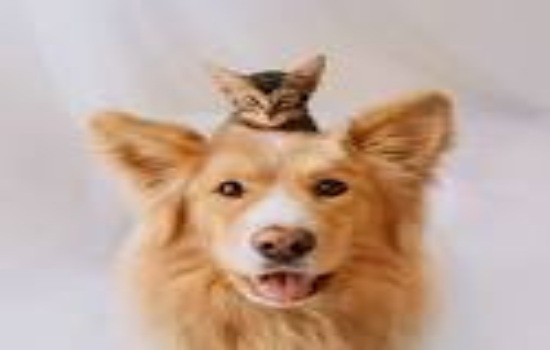

In [ ]:
newImg = cv2.resize(img, (550, 350))

#cv2.imshow('Resized Image', newImg)

#cv2.waitKey(0)
cv2_imshow( newImg)

## Ajustar el contraste de la imagen
En el módulo Python OpenCV, no hay una función particular para ajustar el contraste de la imagen, pero la documentación oficial de OpenCV sugiere una ecuación que puede realizar el brillo y el contraste de la imagen al mismo tiempo.

$$NewImage = a * img + b$$

Aquí a es alfa que define el contraste de la imagen. Si a es mayor que 1, habrá mayor contraste.

Si el valor de a está entre 0 y 1 (menor que 1 pero mayor que 0), habrá menor contraste. Si a es 1, no habrá efecto de contraste en la imagen.

b significa beta. Los valores de b varían de -127 a +127.

Para implementar esta ecuación en Python OpenCV, puede usar el método addWeighted(). Usamos el método addWeighted() ya que genera la salida en el rango de 0 y 255 para una imagen en color de 24 bits.

La sintaxis del método addWeighted() es la siguiente:

cv2.addWeighted(source_img1, alpha1, source_img2, alpha2, beta)

In [ ]:
import numpy as np

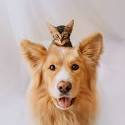

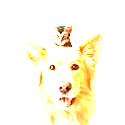

In [ ]:
contrast_img = cv2.addWeighted(img, 2.5, np.zeros(img.shape, img.dtype), 0, 0)

#cv2.imshow('Original Image', img)

#cv2.imshow('Contrast Image', contrast_img)

#cv2.waitKey(0)
cv2_imshow( img)
cv2_imshow( contrast_img)

## Detectar bordes
Para detectar los bordes de una imagen, puede utilizar el método Canny() de cv2 que implementa el detector de bordes Canny. El detector de bordes Canny también se conoce como el detector óptimo .

La sintaxis de Canny() es la siguiente:
cv2.Canny(imagen, minVal, maxVal)

Aquí minVal y maxVal son los valores de gradiente de intensidad mínimo y máximo respectivamente.

Considere el siguiente código:

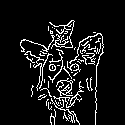

In [ ]:
import cv2

edge_img = cv2.Canny(img,100,200)

#cv2.imshow("Detected Edges", edge_img)

#cv2.waitKey(0)
cv2_imshow( edge_img)

## Convertir imagen a escala de grises (Blanco y negro)
La manera fácil de convertir una imagen en escala de grises es cargarla así:

In [ ]:
img2 = cv2.imread("/content/imagen_prueba.jpg",0)

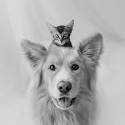

In [ ]:
#cv2.imshow('Resized Image', img2)

#cv2.waitKey(0)
cv2_imshow( img2)

Otra forma

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

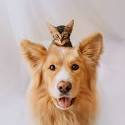

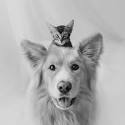

In [ ]:
#cv2.imshow("Original Image", img)

#cv2.imshow("Gray Scale Image", gray_img)

#cv2.waitKey(0)

cv2_imshow( img)

cv2_imshow( gray_img)



## Extraer texto de la imagen (OCR)
Para extraer texto de una imagen, puede utilizar Google Tesseract-OCR. 

pip instalar pytesseract

Luego, debe instalar el módulo pytesseract, que es un contenedor de Python para Tesseract-OCR.

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 12 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,897 kB/s)
debconf: unable to initi

In [ ]:
import pytesseract

In [ ]:
print(pytesseract.image_to_string('/content/prueba_texto.jpg'))

COMO EXTRAER

EL TEXTO DE

UNA IMAGEN a
EN SEGUNDOS

